# La fonction produit

On considère la fonction :
$$
g(X_1,X_2)=X_1 X_2
$$
pour tout $X_1,X_2\in\mathbb{R}$. 

On suppose que les variables sont indépendantes et suivent les lois suivantes.

| Variable | Distribution |
|--|--|
| $X_1$ | Normal($\mu=0$, $\sigma=10$) |
| $X_2$ | Uniforme($a=-1$, $b=1$) |


In [1]:
import openturns as ot
import openturns.viewer as Viewer
import numpy as np

In [2]:
g = ot.SymbolicFunction(["X1","X2"],["X1*X2"])

In [3]:
X1 = ot.Normal(0.,10.)
X2 = ot.Uniform(-1.,1.)
X = ot.ComposedDistribution([X1,X2])
inputDescription = ["X1","X2"]
X.setDescription(inputDescription)

In [4]:
n = 10000
sampleX = X.getSample(n)
sampleY = g(sampleX)

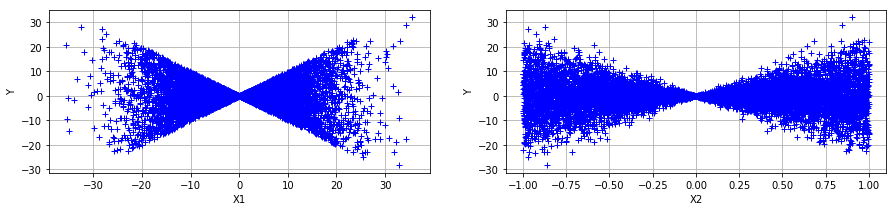

In [5]:
def plotXvsY(sampleX, sampleY, figsize=(15,3)):
    import pylab as pl
    dimX = sampleX.getDimension()
    inputdescr = sampleX.getDescription()
    fig = pl.figure(figsize=figsize)
    for i in range(dimX):
        ax = fig.add_subplot(1, dimX, i+1)
        graph = ot.Graph('', inputdescr[i], 'Y', True, '')
        cloud = ot.Cloud(sampleX[:,i],sampleY)
        graph.add(cloud)
        _ = ot.viewer.View(graph, figure=fig, axes=[ax])

plotXvsY(sampleX, sampleY)

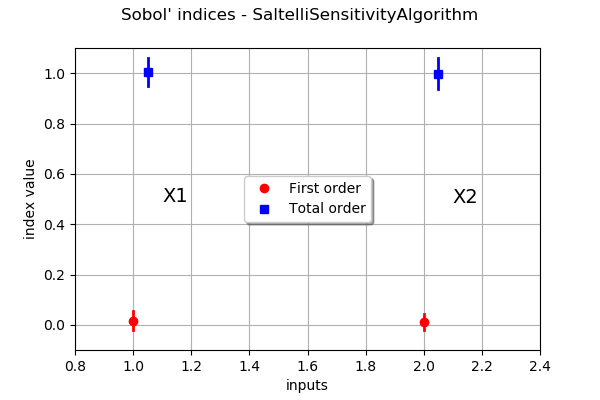

In [6]:
size = 10000
sie = ot.SobolIndicesExperiment(X, size, True)
inputDesign = sie.generate()
outputDesign = g(inputDesign)
sensitivityAnalysis = ot.SaltelliSensitivityAlgorithm(inputDesign, outputDesign, size)
graph = sensitivityAnalysis.draw()
graph.setLegendPosition("center")
graph

On observe qu'aucune des deux variables n'a un impact sur la variabilité de la sortie par son effet seul. Chaque variable a un impact par ses interactions.

Pour $i=1,2$, notons $\mu_i = E(X_i)$ l'espérance et $\sigma_i^2=V(X_i)$ la variance. 

Notons $f_i$ la densité de probabilité de la variable $X_i$ pour $i=1,2$ et $f_{1,2}$ la densité de probabilité 
du vecteur aléatoire $(X_1,X_2)$. Puisque les variable $X_1$ et $X_2$ sont indépendantes, la densité de probabilité du vecteur aléatoire $(X_1,X_2)$ est le produit des lois marginales :
$$
f_{1,2}(x_1,x_2) = f_1(x_1)f_2(x_2)
$$
pour tout $x_1,x_2\in\mathbb{R}$.

On en déduit que l'espérance de $Y$ est égale au produit des espérances de $X_1$ et $X_2$. 
En effet, 
\begin{align}
E(Y) 
&= E(X_1 X_2) \\
&= \int_{\mathbb{R}^2} x_1 x_2 f_{1,2}(x_1,x_2) dx_1 dx_2 \\
&= \int_{\mathbb{R}^2} x_1 x_2 f_1(x_1)f_2(x_2) dx_1 dx_2 \\
&= \left(\int_{\mathbb{R}} x_1 f_1(x_1) dx_1\right) \left(\int_{\mathbb{R}} f_2(x_2) dx_2 \right) \\
&= E(X_1)E(X_2) \\
&= \mu_1 \mu_2
\end{align}

La variance de $Y$ est :
\begin{align}
V(Y) 
&= E(Y^2) - E(Y)^2 \\
&= E[(X_1X_2)^2] - E(Y)^2 \\
&= E(X_1^2)E(X_2^2) - E(Y)^2 \textrm{ (par indépendance)}.
\end{align}
Or, pour $i=1,2$, on a :
$$
E(X_i^2) = V(X_i) + E(X_i)^2 = \sigma_i^2 + \mu_i^2.
$$
Par conséquent, 
\begin{align}
V(Y) 
&= (\sigma_1^2 + \mu_1^2)(\sigma_2^2 + \mu_2^2) - \mu_1^2 \mu_2^2 \\
&= \sigma_1^2 \sigma_2^2 + \sigma_1^2 \mu_2^2 + \sigma_2^2 \mu_1^2.
\end{align}

L'indice de Sobol' du premier ordre de $X_1$ est :
\begin{align}
S_1
&= \frac{V[E(Y|X_1)]}{V(Y)} \\
&= \frac{V[X_1E(X_2)]}{V(Y)} \\
&= \frac{V(X_1 \mu_2)}{V(Y)} \\
&= \frac{\mu_2^2 V(X_1)}{V(Y)} \\
&= \frac{\mu_2^2 \sigma_1^2}{V(Y)}.
\end{align}
De même, 
\begin{align}
S_2
&= \frac{\mu_1^2 \sigma_2^2}{V(Y)}.
\end{align}

Etant donnée la variance totale $V(Y)$, l'indice du second ordre $S_{1,2}$ est égal à 
\begin{align}
S_{1,2} 
&= 1 - S_1 - S_2 \\
&= \frac{V(Y) - S_1 V(Y) - S_2 V(Y)}{V(Y)} \\
&= \frac{\sigma_1^2 \sigma_2^2 + \sigma_1^2 \mu_2^2 + \sigma_2^2 \mu_1^2 - \mu_2^2 \sigma_1^2 - \mu_1^2 \sigma_2^2}{V(Y)} \\
&= \frac{\sigma_1^2 \sigma_2^2}{V(Y)}.
\end{align}

L'indice SRC de $X_1$ est égal à la corrélation entre $Y$ et $X_1$. 
Par définition, la covariance est égale à :
\begin{align}
Cov(Y,X_1)
&= E[(Y-E(Y))(X_1-E(X_1))] \\
&= E(YX_1) - E(Y)E(X_1) \\
&= E(X_1^2 X_2) - \mu_1 \mu_2 \mu_1 \\
&= E(X_1^2) E(X_2) - \mu_1^2 \mu_2 \textrm{ (par indépendance)} \\
&= (\sigma_1^2 + \mu_1^2) \mu_2 - \mu_1^2 \mu_2 \\
&= \sigma_1^2 \mu_2.
\end{align}

De même, 
\begin{align}
Cov(Y,X_2)
&= E[(Y-E(Y))(X_2-E(X_2))] \\
&= E(YX_2) - E(Y)E(X_2) \\
&= E(X_1 X_2^2) - \mu_1 \mu_2 \mu_2 \\
&= E(X_1) E(X_2^2) - \mu_1 \mu_2^2 \textrm{ (par indépendance)} \\
&= \mu_1 (\sigma_2^2 + \mu_2^2) - \mu_1 \mu_2^2 \\
&= \mu_1 \sigma_2^2 .
\end{align}


Par conséquent,
\begin{align}
SRC_1
&= Corr(Y,X_1) \\
&= \frac{Cov(Y,X_1)}{\sqrt{V(Y)}\sqrt{V(X_1)}} \\
&= \frac{\sigma_1^2 \mu_2}{\sqrt{V(Y)}\sigma_1} \\
&= \frac{\sigma_1 \mu_2}{\sqrt{V(Y)}}
\end{align}
et :
\begin{align}
SRC_2
&= Corr(Y,X_2) \\
&= \frac{Cov(Y,X_2)}{\sqrt{V(Y)}\sqrt{V(X_2)}} \\
&= \frac{\mu_1 \sigma_2^2}{\sqrt{V(Y)}\sigma_2} \\
&= \frac{\mu_1 \sigma_2}{\sqrt{V(Y)}}.
\end{align}



In [7]:
mu1 = X1.getMean()[0]
mu2 = X2.getMean()[0]
sigma1 = X1.getStandardDeviation()[0]
sigma2 = X2.getStandardDeviation()[0]
EY = mu1*mu2
VY = sigma1**2*sigma2**2+sigma1**2*mu2**2+sigma2**2*mu1**2
S1 = sigma1**2*mu2**2/VY
S2 = mu1**2*sigma2**2/VY
S12 = sigma1**2*sigma2**2/VY
T1 = S1 + S12
T2 = S2 + S12
SRC1 = sigma1*mu2/np.sqrt(VY)
SRC2 = mu1*sigma2/np.sqrt(VY)
print("E(Y)=%f" % (EY))
print("V(Y)=%f" % (VY))
print("S1=%f, T1 = %f, SRC1 = %f" % (S1,T1,SRC1))
print("S2=%f, T2 = %f, SRC2 = %f" % (S2,T2,SRC2))


E(Y)=0.000000
V(Y)=33.333333
S1=0.000000, T1 = 1.000000, SRC1 = 0.000000
S2=0.000000, T2 = 1.000000, SRC2 = 0.000000


On observe que les indices SRC sont égaux à zéro. On observe également que les indices du premier ordre sont égaux à zéro tandis que les indices totaux sont égaux à 1. Cela implique que la variabilité de la sortie est dûe exclusivement à l'interaction entre X1 et X2. C'est une conclusion cohérente avec la structure de la fonction produit. 